<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/PhD_Work_Creativity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Guide to Creativity and Machine Learning

#LSTM

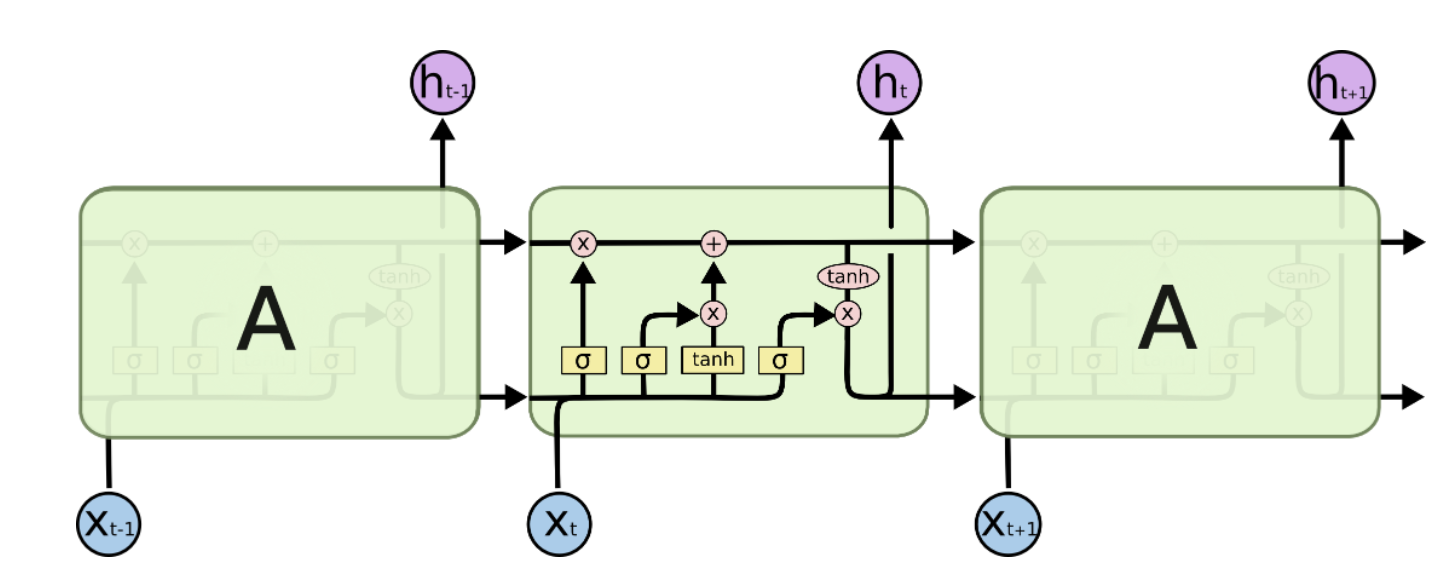

#Dataset

Articles April - 2017 





In [ ]:
import pandas 

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [ ]:
text_csv= pandas.read_csv("/content/sample_data/ArticlesApril2017.csv")

df=pandas.DataFrame(text_csv)

df.describe()

,articleWordCount,multimedia,printPage
count,886.000000,886.000000,886.000000
mean,1093.505643,3.857788,7.635440
std,799.095918,7.891072,10.809874
min,57.000000,0.000000,0.000000
25%,708.500000,3.000000,0.000000
50%,982.500000,3.000000,2.000000
75%,1291.750000,3.000000,13.000000
max,7832.000000,68.000000,74.000000


In [ ]:
df[1:100]

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...
3,NaN,58defd317c459f24986d7c95,1374,By MICHAEL POWELL,article,Stain Permeates Basketball Blue Blood,"['Basketball (College)', 'University of North ...",3,Sports,1,2017-04-01 01:06:52,College Basketball,"For two decades, until 2013, North Carolina en...",The New York Times,News,https://www.nytimes.com/2017/03/31/sports/ncaa...
4,NaN,58df09b77c459f24986d7ca7,708,By DEB AMLEN,article,Taking Things for Granted,['Crossword Puzzles'],3,Games,0,2017-04-01 02:00:14,Unknown,In which Howard Barkin and Will Shortz teach u...,The New York Times,News,https://www.nytimes.com/2017/03/31/crosswords/...
5,NaN,58df09b77c459f24986d7ca8,1065,By BEN BRANTLEY,article,The Caged Beast Awakens,"['Theater', 'Park Avenue Armory (Manhattan, NY...",3,Culture,1,2017-04-01 02:00:17,Unknown,"In this visually ravishing production, Bobby C...",The New York Times,Review,https://www.nytimes.com/2017/03/31/theater/hai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,58e43fde7c459f24986d866d,724,By THE EDITORIAL BOARD,article,The Supreme Court as Partisan Tool,"['United States Politics and Government', 'Fil...",3,Editorial,22,2017-04-05 00:52:38,Unknown,The judicial confirmation process is mirroring...,The New York Times,Editorial,https://www.nytimes.com/2017/04/04/opinion/the...
96,NaN,58e444817c459f24986d8677,877,By ERICA L. GREEN,article,2 Picks for Education Dept. Raise Fears on Civ...,"['Trump, Donald J', 'United States Politics an...",3,National,11,2017-04-05 01:12:24,Politics,"The two selections for high-profile posts, bot...",The New York Times,News,https://www.nytimes.com/2017/04/04/us/politics...
97,NaN,58e447087c459f24986d867e,1189,By PETER BAKER,article,"For Trump, a Focus on U.S. Interests and a Dis...","['Trump, Donald J', 'United States Internation...",3,Foreign,1,2017-04-05 01:23:10,Politics,Where other American presidents might have use...,The New York Times,News Analysis,https://www.nytimes.com/2017/04/04/us/politics...
98,NaN,58e44fab7c459f24986d8691,725,By DEB AMLEN,article,At the Center of the Universe,['Crossword Puzzles'],3,Games,0,2017-04-05 02:00:04,Unknown,Alex Eaton-Salners returns with a controversia...,The New York Times,News,https://www.nytimes.com/2017/04/04/crosswords/...


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential


# set seeds for reproducability
import tensorflow 
import pandas as pd
import numpy as np
import string 
import os 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from keras.utils import np_utils

In [ ]:
import keras.utils as ku 

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from numpy import random

In [ ]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [ ]:
curr_dir = '/content/sample_data/'
all_headlines = []
for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        article_df = pd.read_csv(curr_dir + filename)
        all_headlines.extend(list(article_df.headline.values))
        break

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

831

In [ ]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

['finding an expansive view  of a forgotten people in niger',
 'and now  the dreaded trump curse',
 'venezuelas descent into dictatorship',
 'stain permeates basketball blue blood',
 'taking things for granted',
 'the caged beast awakens',
 'an everunfolding story',
 'oreilly thrives as settlements add up',
 'mouse infestation',
 'divide in gop now threatens trump tax plan']

In [ ]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[169, 17],
 [169, 17, 665],
 [169, 17, 665, 367],
 [169, 17, 665, 367, 4],
 [169, 17, 665, 367, 4, 2],
 [169, 17, 665, 367, 4, 2, 666],
 [169, 17, 665, 367, 4, 2, 666, 170],
 [169, 17, 665, 367, 4, 2, 666, 170, 5],
 [169, 17, 665, 367, 4, 2, 666, 170, 5, 667],
 [6, 80]]

In [ ]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 10)            24220     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 2422)              244622    
                                                                 
Total params: 313,242
Trainable params: 313,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(predictors, label, epochs=100, verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [ ]:
#Generating Text

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        np.argmax(predicted)
        
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            #print(type(index))
            #print(type(predicted))
            if index == predicted.all():
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
print (generate_text("united states", 5, model, max_sequence_len))
print (generate_text("preident trump", 4, model, max_sequence_len))
print (generate_text("donald trump", 4, model, max_sequence_len))
print (generate_text("india and china", 4, model, max_sequence_len))
print (generate_text("new york", 4, model, max_sequence_len))
print (generate_text("science and technology", 5, model, max_sequence_len))

United States The The The The The
Preident Trump The The The The
Donald Trump The The The The
India And China The The The The
New York The The The The
Science And Technology The The The The The


In [ ]:
#Able to do Text Generation
#LSTM
#RNN


In [ ]:
#What are we wanting to do? 
#We are wanting to generate Creative Text
# 

#Generative Adversial Networks

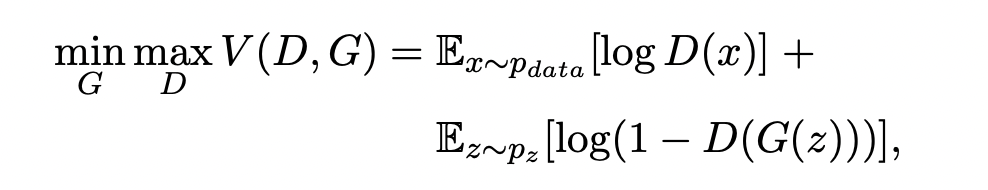

## Generate Text using GAN 

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

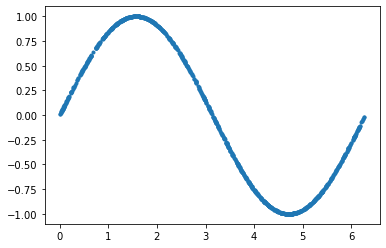

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()


In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.21308739483356476
Epoch: 0 Loss G.: 1.7989580631256104
Epoch: 10 Loss D.: 0.6099680662155151
Epoch: 10 Loss G.: 0.907738447189331
Epoch: 20 Loss D.: 0.6200630068778992
Epoch: 20 Loss G.: 0.953209638595581
Epoch: 30 Loss D.: 0.6275914907455444
Epoch: 30 Loss G.: 0.9946513175964355
Epoch: 40 Loss D.: 0.6227079033851624
Epoch: 40 Loss G.: 0.8192576169967651
Epoch: 50 Loss D.: 0.6241480708122253
Epoch: 50 Loss G.: 0.7858664393424988
Epoch: 60 Loss D.: 0.6772599220275879
Epoch: 60 Loss G.: 0.8656211495399475
Epoch: 70 Loss D.: 0.6495099067687988
Epoch: 70 Loss G.: 0.8636514544487
Epoch: 80 Loss D.: 0.6964038610458374
Epoch: 80 Loss G.: 0.5955417156219482
Epoch: 90 Loss D.: 0.686946451663971
Epoch: 90 Loss G.: 0.6368476748466492
Epoch: 100 Loss D.: 0.6943280100822449
Epoch: 100 Loss G.: 0.6687246561050415
Epoch: 110 Loss D.: 0.6754927039146423
Epoch: 110 Loss G.: 0.749114990234375
Epoch: 120 Loss D.: 0.6884811520576477
Epoch: 120 Loss G.: 0.689706563949585
Epoch: 130 Loss

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

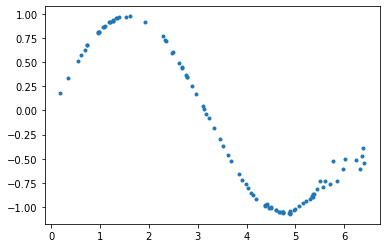

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
#Digit Generation

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(111)

In [ ]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

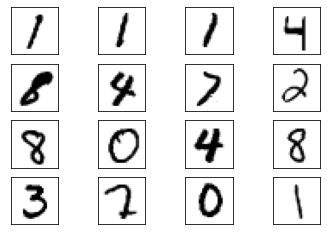

In [ ]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator().to(device=device)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [ ]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5692477226257324
Epoch: 0 Loss G.: 0.4779079854488373
Epoch: 1 Loss D.: 0.06096680834889412
Epoch: 1 Loss G.: 3.8333747386932373
Epoch: 2 Loss D.: 0.011416684836149216
Epoch: 2 Loss G.: 5.403036594390869
Epoch: 3 Loss D.: 0.04152332618832588
Epoch: 3 Loss G.: 5.134734630584717
Epoch: 4 Loss D.: 0.006647448055446148
Epoch: 4 Loss G.: 6.727372169494629
Epoch: 5 Loss D.: 0.08717642724514008
Epoch: 5 Loss G.: 4.58128547668457
Epoch: 6 Loss D.: 0.1770595908164978
Epoch: 6 Loss G.: 3.0975842475891113
Epoch: 7 Loss D.: 0.06646732240915298
Epoch: 7 Loss G.: 3.1782543659210205
Epoch: 8 Loss D.: 0.16090232133865356
Epoch: 8 Loss G.: 2.8278183937072754
Epoch: 9 Loss D.: 0.4348783791065216
Epoch: 9 Loss G.: 2.3554561138153076
Epoch: 10 Loss D.: 0.3388947546482086
Epoch: 10 Loss G.: 1.9112112522125244
Epoch: 11 Loss D.: 0.38758739829063416
Epoch: 11 Loss G.: 1.5978403091430664
Epoch: 12 Loss D.: 0.2804984450340271
Epoch: 12 Loss G.: 1.3075517416000366
Epoch: 13 Loss D.: 0.288892

In [ ]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

In [ ]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Seq2Seq Model: Text Generation using LSTM

#Boden's Criteria for Creativity

1. Surprise 
2. Useful 
3. Novel 

#Composer-Audience Model 

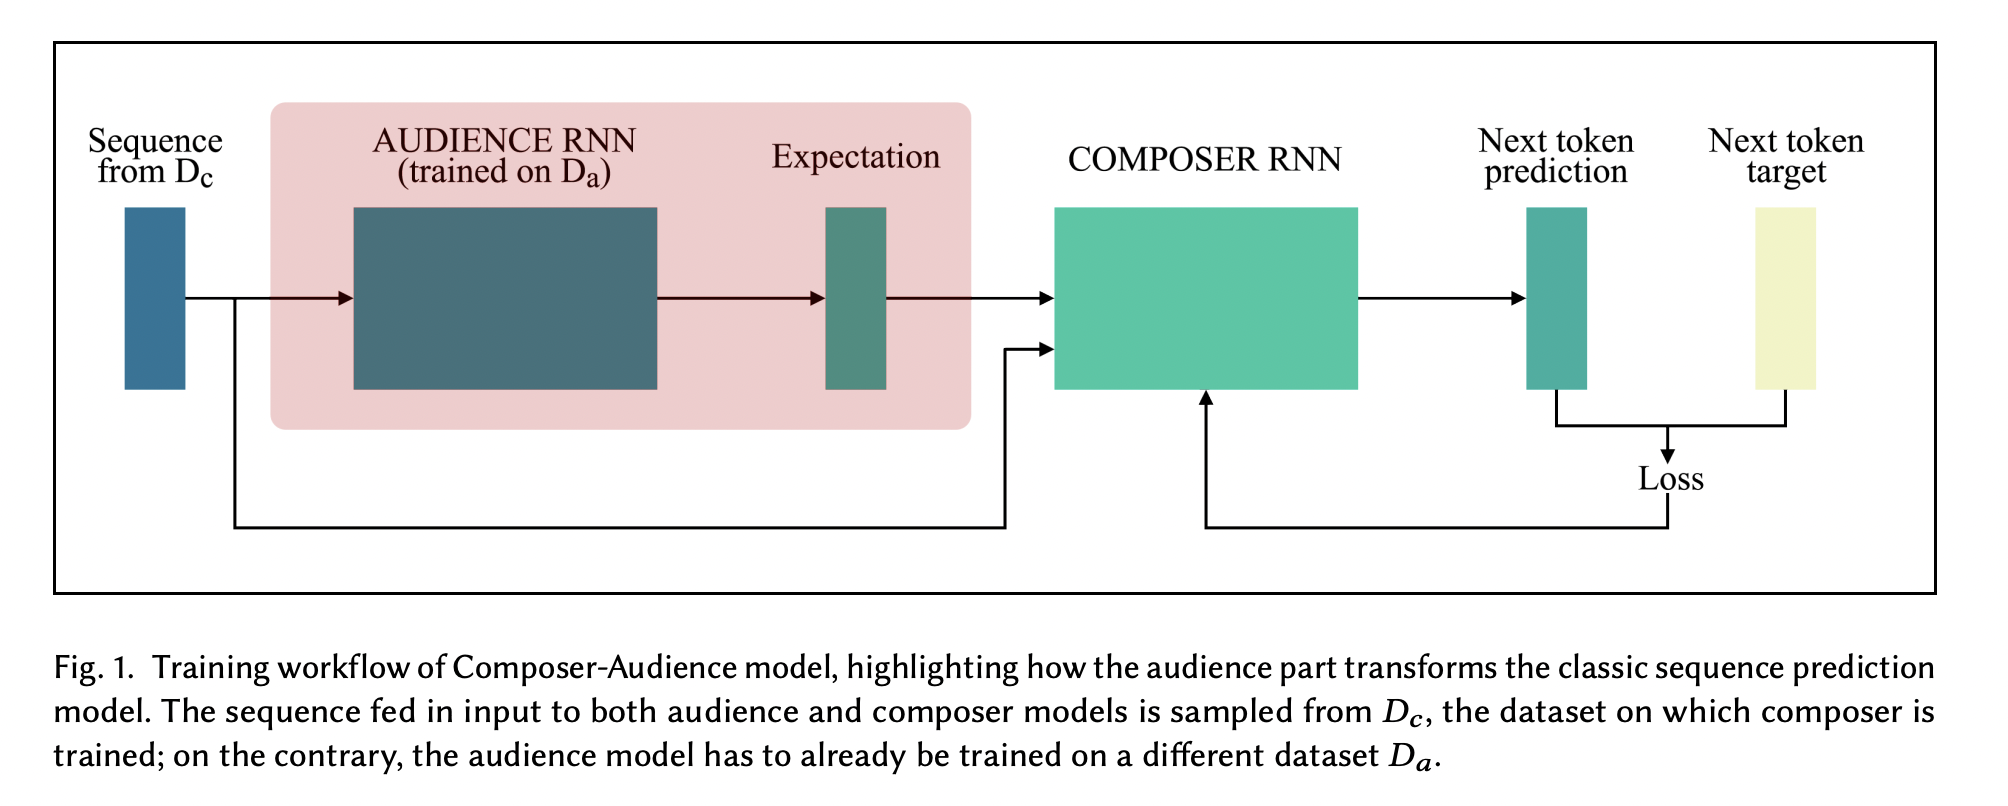

1. Sequence Prediction Model 
2. Designed to Produce Surprise 

a. Audience RNN --> Predict next token
                --> Trained given dataset 
                
b. Composer RNN --> Trained different dataset
                --> Receives expectation from Audience RNN

#Limitation

1. No Novelty 


#Creative Adversarial Network

1. Creativity Oriented 
2. Issue with GAN, generate as close as possible 
3. With Original Dataset 
4. But not creative 

(CAN)

5. Increase Stylistic Ambiguity 
6. Deviations from Style Norm (Novelty)

7. CAN Discriminator -> Art or Not Art 

Issue
1. Surprise is not taken into account

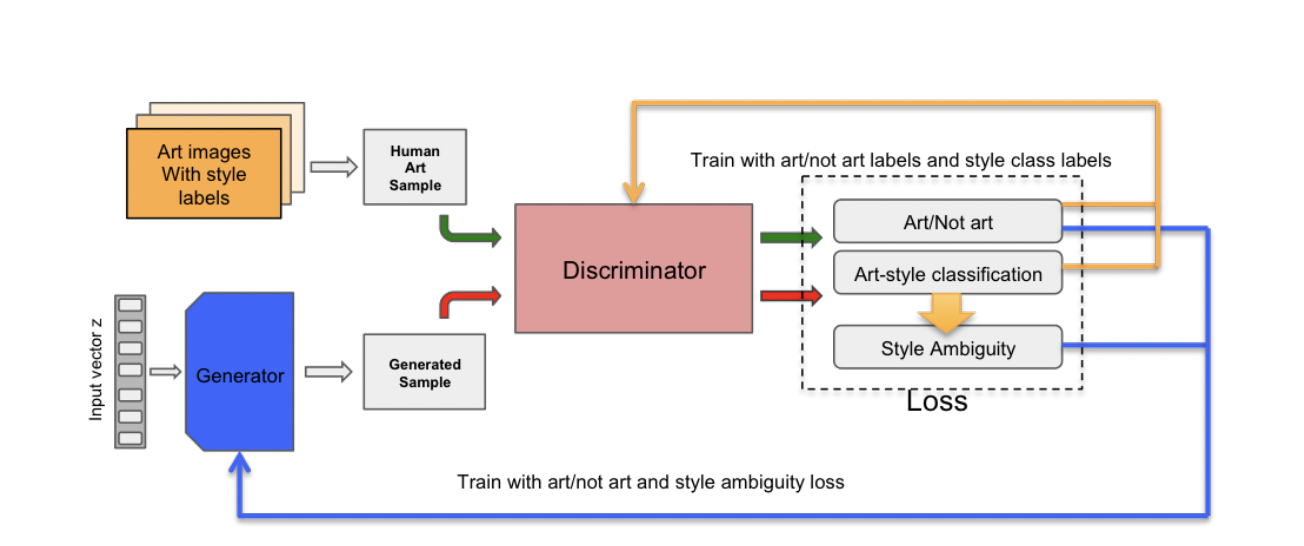

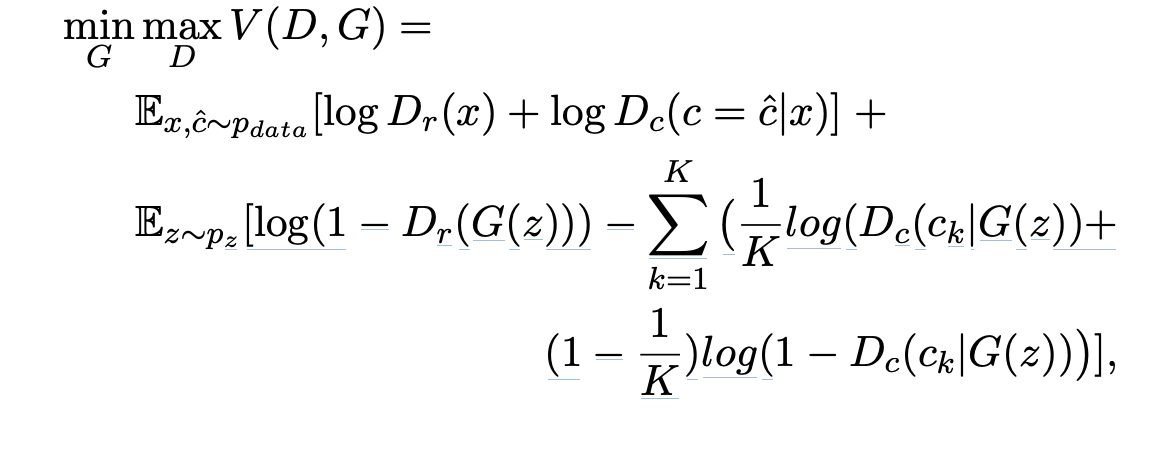

#Schmidhuber's Model 

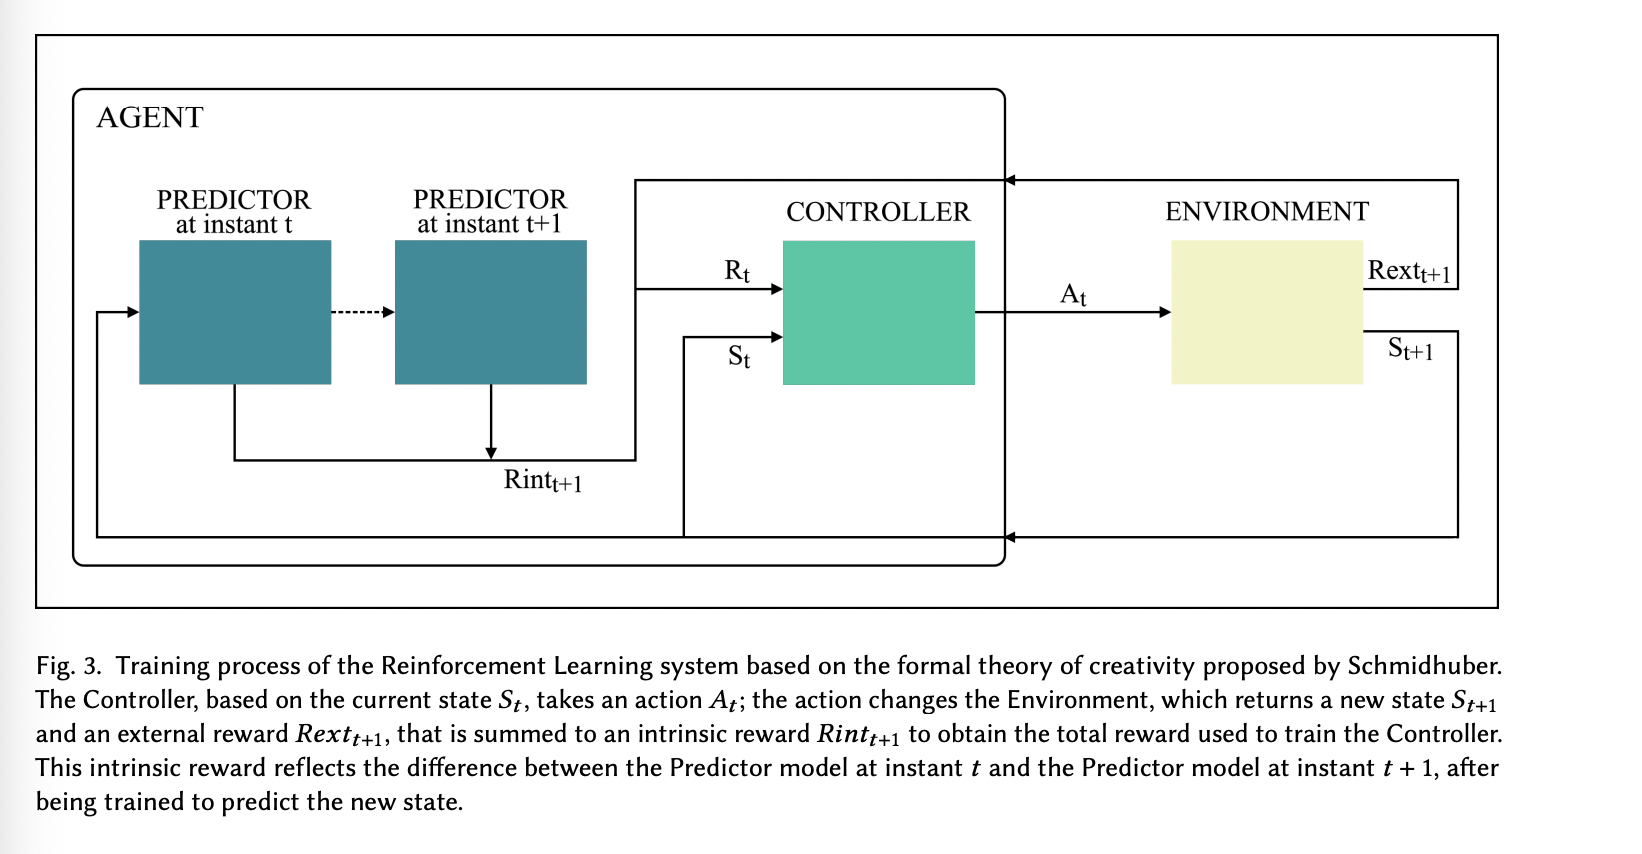

1. Reinforcement Learning 
2. Agent can learn to be Creative 
3. Intrisic Reward to measure novelty
4. Intrisic Reward to measure surprise 
5. Intrisic Reward to measure interestingness

## Two Learning Modules 

1.  an adaptive predictor of the growing data history
2.  When agent is interacting with its environment 
3.  and a controller which acts in the environment

Issue: 
1. Does not include Boden's approach
2. Does not include Value 

#Creative Text Generation using Seq2Seq Model

1. RNN Text Generation
2. LSTM Text Generation 

#Goal: 

Generate Text, which is Novel, Useful, Surprise

1. Novel 
2. Surprise 
3. Useful 


#Transformers




In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 6.8 MB/s 
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 6.6 MB 35.6 MB/s 
     |████████████████████████████████| 596 kB 43.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from transformers import pipeline

In [4]:
gpt2_generator = pipeline('text-generation', model='gpt2')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [5]:
# generate 3 different sentences
# results are sampled from the top 50 candidates
sentences = gpt2_generator("To be honest, neural networks", do_sample=True, top_k=50, temperature=0.6, max_length=128, num_return_sequences=3)
for sentence in sentences:
  print(sentence["generated_text"])
  print("="*50)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


To be honest, neural networks are very difficult to read. I think I'd say that this is because of the way the brain works.

I've been working in a lot of different areas of science, and I'm very familiar with all kinds of things. For instance, I've been working on artificial intelligence, and I've been doing it for a while. I've been doing it for a while and I'm going through the same thing with neural networks. I think it's very interesting to see how these things could be used for machine learning.

What is the first step in Neural Networks?

The first
To be honest, neural networks are very good at recognizing patterns in language, and they know a lot of things. The most common thing they do is to use the neural network to ask their users to use certain words, or to ask them to do certain actions. But there are some things that they can do that are not very good at.

What are the different kinds of neural networks?

The neural networks are very good at recognizing patterns in languag

#GPT-J Model

In [ ]:
#GPT Model 

#Decoder Only 
#Doesn't use Masking in multi-attention block
#Decoder sees prior words in sentence 
#Takes Word Vectors as Input
#Produces Estimates for probability of next word as output
#Auto-regressive in each sentence 
#

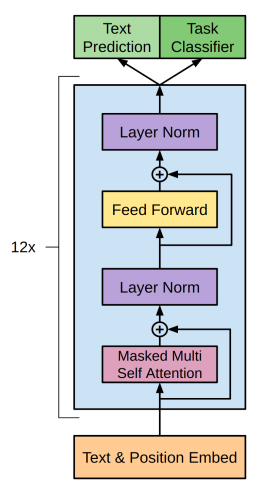

In [ ]:
# download & load GPT-J model! It's 22.5GB in size
gpt_j_generator = pipeline('text-generation', model='EleutherAI/gpt-j-6B')

Downloading:   0%|          | 0.00/930 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/22.5G [00:00<?, ?B/s]

In [1]:
# generate sentences with TOP-K sampling
sentences = gpt_j_generator("To be honest, robots will", do_sample=True, top_k=50, temperature=0.6, max_length=128, num_return_sequences=3)
for sentence in sentences:
  print(sentence["generated_text"])
  print("="*50)

NameError: ignored